In [155]:
import pandas as pd
import numpy as np
import uncertainties as unc
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.special import gamma

In [156]:
def linear_fit(x, a, b):
    return a*x + b

def inverse_linear(y, a, b):
    return (y - b) / a

[np.float64(6842.719196039979), np.float64(7758.303429497453), np.float64(2900.25140951548), np.float64(7343.558110902509), np.float64(10516.764488242052), np.float64(1106.6163237633655), np.float64(2771.7522594134007), np.float64(5126.253706036463), np.float64(3057.0854147995487)]
[np.float64(197.09292449955797), np.float64(175.74108034726507), np.float64(226.46904674832874), np.float64(360.9061223315859), np.float64(271.6262906718929), np.float64(493.9543734252532), np.float64(449.99999516463714), np.float64(428.9866493809486), np.float64(365.2873894559563)]
Chi Squared: 0.48376944151777035
[ 6.10592319e-03 -3.83099032e+02] [1.49648780e-04 1.73829928e+02]


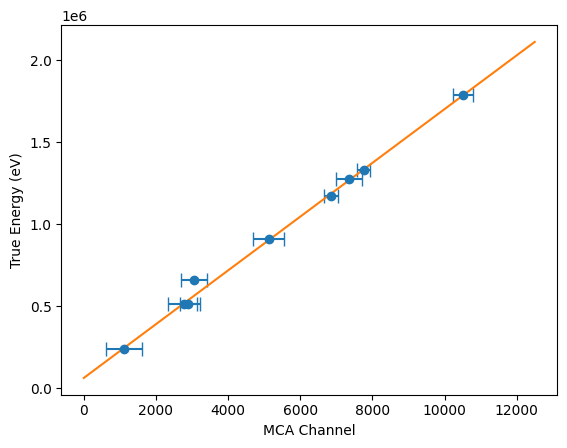

In [164]:
#co60
co60 = pd.read_csv('co60Fits.csv')
trueVals = np.array([1173.2e3, 1332.5e3, 510.99e3, 1274.53e3, 1785.52e3, 238.6e3,  511e3, 911.2e3, 662e3])
mcaChannelsMean = []
mcaChannelsError = []
for i in range(2):
    peaks = 0
    peakList = []
    peakWidths = []
    for j in range(3):
        peaks += unc.ufloat(co60.iloc[j,i*2], co60.iloc[j,(i)*2+1])
        peakList.append(co60.iloc[j,i*2])
        peakWidths.append(co60.iloc[j,(i)*2+1])
    peaks = peaks/3
    # mcaChannelsMean.append(peaks.n)
    # mcaChannelsError.append(peaks.s)
    mcaChannelsMean.append(np.mean(peakList))
    mcaChannelsError.append(np.mean(peakWidths))
na22 = pd.read_csv('na22Fits.csv')

for i in range(3):
    peaks = 0
    peakList = []
    peakWidths = []
    for j in range(3):
        peaks += unc.ufloat(na22.iloc[j,i*2], na22.iloc[j,(i)*2+1])
        peakList.append(na22.iloc[j,i*2])
        peakWidths.append(na22.iloc[j,(i)*2+1])
    peaks = peaks/3
    # mcaChannelsMean.append(peaks.n)
    # mcaChannelsError.append(peaks.s)
    mcaChannelsMean.append(np.mean(peakList))
    mcaChannelsError.append(np.mean(peakWidths))

th232 = pd.read_csv('th232Fits.csv')

for i in range(3):
    peaks = 0
    peakList = []
    peakWidths = []
    for j in range(3):
        peaks += unc.ufloat(th232.iloc[j,i*2], th232.iloc[j,(i)*2+1])
        peakList.append(th232.iloc[j,i*2])
        peakWidths.append(th232.iloc[j,(i)*2+1])
    peaks = peaks/3
    # mcaChannelsMean.append(peaks.n)
    # mcaChannelsError.append(peaks.s)
    mcaChannelsMean.append(np.mean(peakList))
    mcaChannelsError.append(np.mean(peakWidths))

cs137 = pd.read_csv('cs137Fits.csv')
peakList = []
peakWidths = []
for j in range(3):
    peakList.append(cs137.iloc[j,0])
    peakWidths.append(cs137.iloc[j,1])
mcaChannelsMean.append(np.mean(peakList))
mcaChannelsError.append(np.mean(peakWidths))

plt.errorbar(mcaChannelsMean,trueVals, xerr=mcaChannelsError, fmt='o', capsize=5)
#fitting
popt, pcov = curve_fit(linear_fit, trueVals, mcaChannelsMean, sigma=mcaChannelsError)
print(mcaChannelsMean)
print(mcaChannelsError)
chi2 = np.sum(np.pow(mcaChannelsMean-linear_fit(trueVals, *popt), 2)/(np.array(mcaChannelsError)**2))/(len(mcaChannelsMean)-2)
print('Chi Squared:', chi2)
print(popt, np.sqrt(np.diag(pcov)))
plt.plot(np.linspace(0, 12500, 100), inverse_linear(np.linspace(0, 12500, 100), *popt))
plt.ylabel('True Energy (eV)')
plt.xlabel('MCA Channel')
plt.show()
    

4.15284610102337
[4.79370940e+00 1.13131488e+07]


C:\Users\User\AppData\Local\Temp\ipykernel_27628\3087779321.py:18: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(epsilon**2-1)


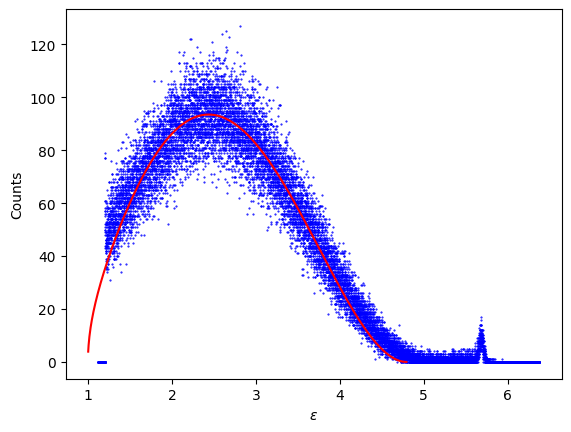

Q= 1.9385815213464739


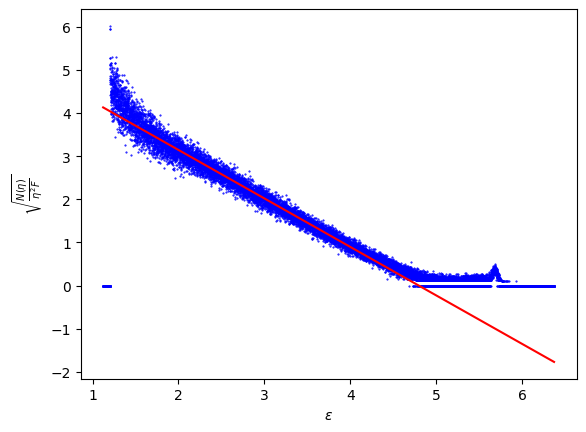

Q= 1.941532039638689


In [163]:
hbar = 6.58211956e-16 # eV*s
e = 1.60217662e-19 # C
c = 299792458 #m/s
me = 0.51099895000e6 # eV/c^2
alpha = 1/137
Z = 53

def s(Z):
    return np.sqrt(1-Z**2/137**2) -1

def delta(z, eta):
    return z*np.sqrt(1+eta**2)/(137*eta)

def fermi(Z, eta):
    return eta**(2*s(Z))*np.exp(np.pi*delta(Z, eta))*np.abs(gamma(1+s(Z)+1j*delta(Z, eta)))**2

def Eta(epsilon):
    return np.sqrt(epsilon**2-1)

def epsilon(eta):
    return np.sqrt(1+eta**2)

def N(eta, Const, Q):
    return Const/(c**2)*eta**2*(Q-epsilon(eta))**2*fermi(Z, eta)


Q = 2.1221/0.51099895069
# etas = np.linspace(0.001,Eta(Q),1000, endpoint=True)
# Ns = N(etas, 1, Q)

# plt.plot(etas, Ns)
# plt.xlabel(r'$\eta$')
# plt.ylabel(r'$N(\eta)$')
# plt.show()
# epsilons = np.linspace(1.001, Q, 1000, endpoint=True)
# etas = Eta(epsilons)
# Ns = N(etas, 1, Q)
# plt.plot(epsilons, Ns)
# plt.xlabel(r'$\epsilon$')
# plt.ylabel(r'$N(\epsilon)$')
# plt.show()

# kurie = np.sqrt(Ns/(etas**2*fermi(Z, etas)))
# plt.figure(figsize=(10,5))
# plt.plot(epsilons, kurie)
# plt.xlabel(r'$\epsilon$')
# plt.ylabel(r'$\sqrt{\frac{N(\eta)}{\eta^2F}}$')
# plt.show()

def betaFit(epsilon, Q, A):
    etas = Eta(epsilon)
    return N(etas, A, Q)*1e10


betaScan = pd.read_csv('Gp3_data_E1/NaI Beta Spectrum/Run6_300s_threshold250.csv', skiprows=6)
betaScan['uncs'] = np.sqrt(betaScan["Counts"]) + 1e-9
betaScan["energy"] = inverse_linear(betaScan["Channel"], *popt)*1e-6/(0.51099895069)+1

maxIndex = np.argmin(np.abs(betaScan['energy']-Q)) + 100
minIdx = np.argmin(np.abs(betaScan['energy']-2))
minIdx = 251
popt1, pcov1 = curve_fit(betaFit, betaScan['energy'][minIdx:maxIndex], betaScan['Counts'][minIdx:maxIndex], sigma=betaScan['uncs'][minIdx:maxIndex], p0=[Q, 5e6], bounds = ([Q-1, 1e5], [Q+1, 1e8]))
print(Q)
print(popt1)
plt.plot(betaScan['energy'], betaScan['Counts'], "bo", markersize=0.5)
plt.plot(np.linspace(0,popt1[0], 1000), betaFit(np.linspace(0,popt1[0], 1000), *popt1), "r-")
plt.xlabel(r"$\epsilon$")
plt.ylabel("Counts")
plt.show()


kurie = np.sqrt(betaScan["Counts"]/(Eta(betaScan["energy"])**2*fermi(Z, Eta(betaScan["energy"]))))
kurieErr = np.sqrt(betaScan["uncs"]/(Eta(betaScan["energy"])**2*fermi(Z, Eta(betaScan["energy"]))))
plt.plot(betaScan["energy"], kurie, "bo", markersize=0.5)

print("Q=", (popt1[0]-1)*0.51099895069)

popt2, pcov2 = curve_fit(linear_fit, betaScan['energy'][minIdx:maxIndex], kurie[minIdx:maxIndex], sigma=kurieErr[minIdx:maxIndex])
plt.plot(betaScan['energy'], linear_fit(betaScan['energy'], *popt2), "r-")
plt.xlabel(r"$\epsilon$")
plt.ylabel(r"$\sqrt{\frac{N(\eta)}{\eta^2F}}$")
plt.show()

print("Q=", (-popt2[1]/popt2[0]-1)*0.51099895069)

